In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,66.0,3.0,8.0,1.0,3.0,0.0,not fire,0
1,2,6,2012,29,61,13,1.0,64.0,4.0,8.0,1.0,4.0,0.0,not fire,0
2,3,6,2012,26,82,22,13.0,47.0,2.0,7.0,0.0,3.0,0.0,not fire,0
3,4,6,2012,25,89,13,2.0,29.0,1.0,7.0,0.0,2.0,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,65.0,3.0,14.0,1.0,4.0,0.0,not fire,0


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,66.0,3.0,8.0,1.0,3.0,0.0,not fire,0
1,29,61,13,1.0,64.0,4.0,8.0,1.0,4.0,0.0,not fire,0
2,26,82,22,13.0,47.0,2.0,7.0,0.0,3.0,0.0,not fire,0
3,25,89,13,2.0,29.0,1.0,7.0,0.0,2.0,0.0,not fire,0
4,27,77,16,0.0,65.0,3.0,14.0,1.0,4.0,0.0,not fire,0


In [9]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
#Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [11]:
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,66.0,3.0,8.0,1.0,3.0,0.0,0,0
1,29,61,13,1.0,64.0,4.0,8.0,1.0,4.0,0.0,0,0
2,26,82,22,13.0,47.0,2.0,7.0,0.0,3.0,0.0,0,0
3,25,89,13,2.0,29.0,1.0,7.0,0.0,2.0,0.0,0,0
4,27,77,16,0.0,65.0,3.0,14.0,1.0,4.0,0.0,0,0
5,31,67,14,0.0,83.0,6.0,22.0,3.0,7.0,2.0,1,0
6,33,54,13,0.0,88.0,10.0,30.0,6.0,11.0,7.0,1,0
7,30,73,15,0.0,87.0,12.0,38.0,6.0,14.0,7.0,1,0
8,25,88,13,0.0,53.0,8.0,39.0,0.0,10.0,0.0,0,0
9,28,79,12,0.0,73.0,10.0,46.0,1.0,13.0,1.0,0,0


In [12]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [13]:
#Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [14]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
x_train.shape,x_test.shape

((181, 11), (61, 11))

In [16]:
#Feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.316601,0.704121,0.495232,0.376843,0.627497,0.467103,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.229583,-0.633860,-0.413571,-0.245095,-0.695001,-0.364498,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.218526,-0.173129,-0.000613,0.105124,-0.007840,0.039183,-0.059470,-0.235477
Rain,-0.316601,0.229583,0.218526,1.000000,-0.528599,-0.274508,-0.289483,-0.334564,-0.284067,-0.367078,-0.062062
FFMC,0.704121,-0.633860,-0.173129,-0.528599,1.000000,0.622639,0.537229,0.757807,0.610608,0.780171,0.221833
DMC,0.495232,-0.413571,-0.000613,-0.274508,0.622639,1.000000,0.876819,0.688036,0.983614,0.613175,0.195754
DC,0.376843,-0.245095,0.105124,-0.289483,0.537229,0.876819,1.000000,0.545855,0.946587,0.545895,-0.082390
ISI,0.627497,-0.695001,-0.007840,-0.334564,0.757807,0.688036,0.545855,1.000000,0.654359,0.752488,0.266098
BUI,0.467103,-0.364498,0.039183,-0.284067,0.610608,0.983614,0.946587,0.654359,1.000000,0.608039,0.095671
Classes,0.525551,-0.435094,-0.059470,-0.367078,0.780171,0.613175,0.545895,0.752488,0.608039,1.000000,0.161852


<Axes: >

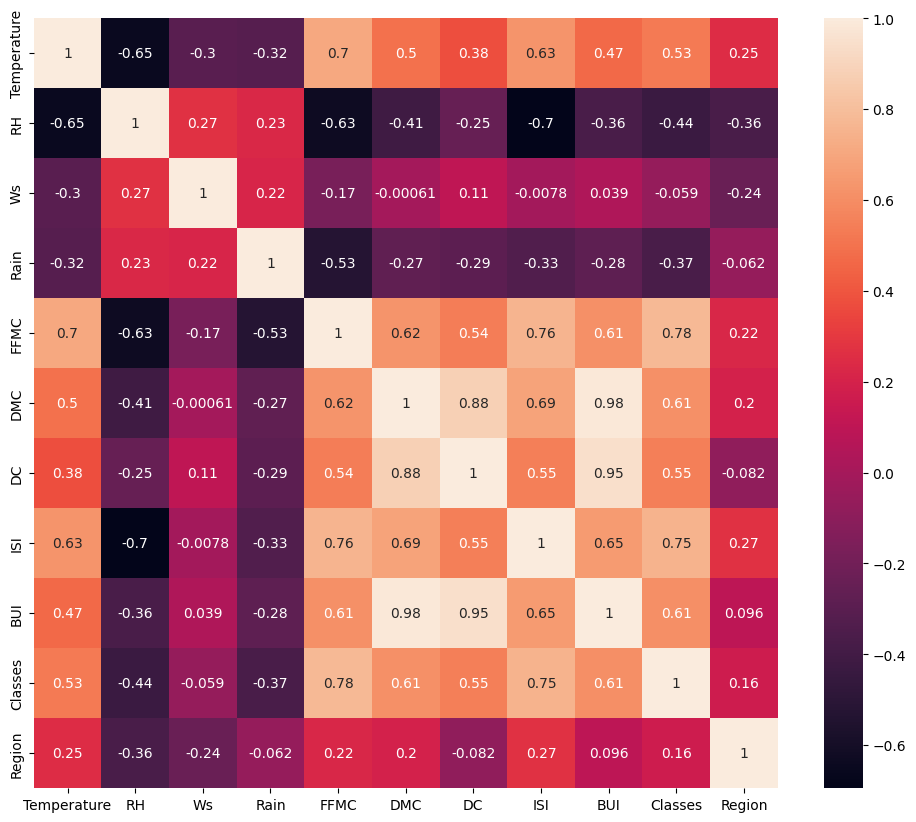

In [17]:
#Check for multicollinearity
import seaborn as sns
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [18]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
##Threshold --domain expertise
corr_features=correlation(x_train,0.85)


In [20]:
corr_features

{'BUI', 'DC'}

##drop features when correlation is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True, errors='ignore')

In [21]:
x_train.shape,x_test.shape

((181, 11), (61, 11))

## Feature Scaling or Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Box Plots to understand Effect of Standard Scaler

Text(0.5, 1.0, 'After scaling')

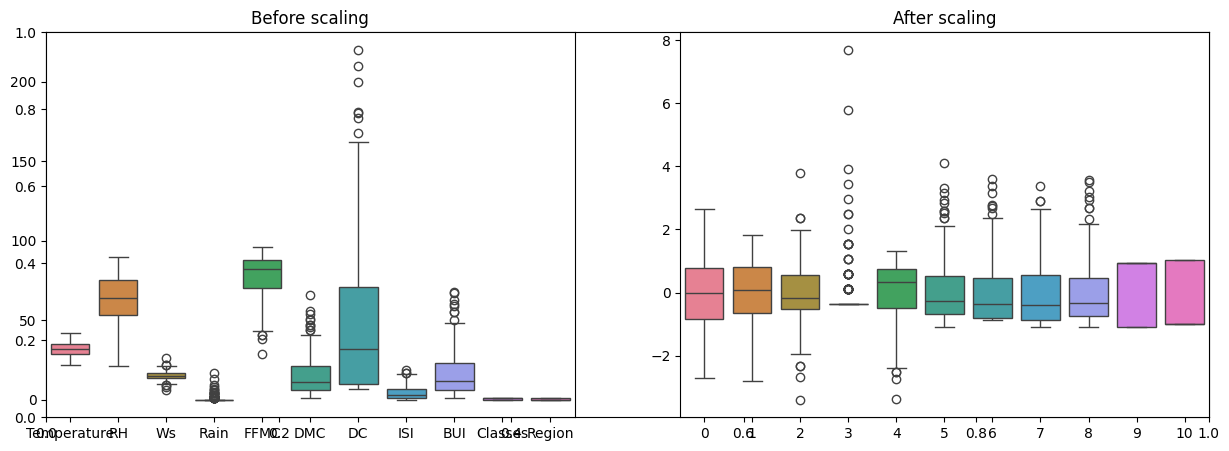

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("Before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("After scaling")

## Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2_score",score)

Mean Absolute error 0.5538678630944341
R2_score 0.9866033573315907


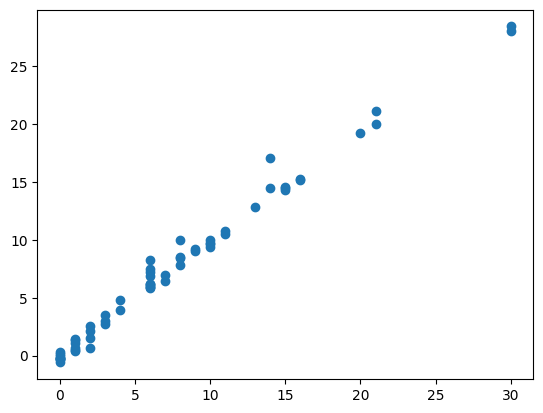

In [25]:
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean Absolute error 1.1093712219437835
R2_score 0.9535283056443352


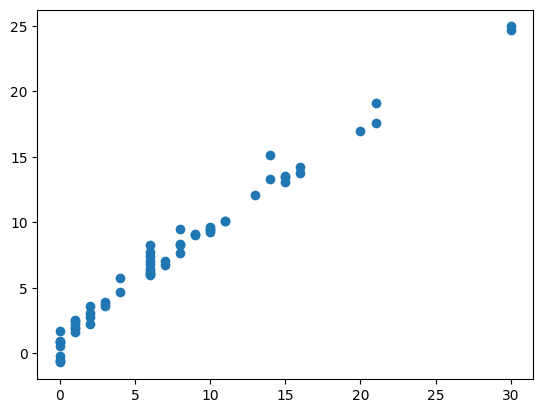

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2_score",score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [27]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [28]:
lassocv.alpha_

np.float64(0.04588804205727472)

In [29]:
lassocv.alphas_

array([6.97457437, 6.5045114 , 6.0661291 , 5.6572923 , 5.27600974,
       4.92042434, 4.58880421, 4.27953416, 3.99110788, 3.72212057,
       3.4712621 , 3.23731065, 3.01912675, 2.81564771, 2.62588248,
       2.44890679, 2.28385867, 2.12993424, 1.9863838 , 1.85250818,
       1.72765533, 1.61121714, 1.5026265 , 1.4013545 , 1.3069079 ,
       1.21882668, 1.13668184, 1.06007329, 0.9886279 , 0.92199769,
       0.85985813, 0.80190657, 0.74786075, 0.69745744, 0.65045114,
       0.60661291, 0.56572923, 0.52760097, 0.49204243, 0.45888042,
       0.42795342, 0.39911079, 0.37221206, 0.34712621, 0.32373107,
       0.30191267, 0.28156477, 0.26258825, 0.24489068, 0.22838587,
       0.21299342, 0.19863838, 0.18525082, 0.17276553, 0.16112171,
       0.15026265, 0.14013545, 0.13069079, 0.12188267, 0.11366818,
       0.10600733, 0.09886279, 0.09219977, 0.08598581, 0.08019066,
       0.07478607, 0.06974574, 0.06504511, 0.06066129, 0.05657292,
       0.0527601 , 0.04920424, 0.04588804, 0.04279534, 0.03991

In [30]:
lassocv.mse_path_

array([[54.57406817, 60.08537955, 39.85144706, 77.95556348, 54.26223626],
       [48.19108971, 53.93917741, 34.386775  , 75.26316343, 48.36460363],
       [42.32688252, 47.98762193, 29.52808632, 68.34943086, 43.22896745],
       [37.2083762 , 42.56894291, 25.38579789, 62.25395697, 38.75649318],
       [32.73976207, 37.82000617, 21.86101271, 56.87570692, 33.9282783 ],
       [28.88336409, 33.65580685, 18.86800228, 52.12643211, 29.44981874],
       [25.54634806, 30.00272322, 16.33262904, 47.92902992, 25.56799057],
       [22.62588058, 26.79616279, 14.19071088, 43.26683618, 22.20391882],
       [20.06898079, 23.97993979, 12.38673931, 38.10297299, 19.29004214],
       [17.82934651, 21.50505368, 10.87272782, 33.59266483, 16.76657507],
       [15.86682441, 19.32862357,  9.60720259, 29.68304762, 14.58193326],
       [14.14621836, 17.41365609,  8.55427888, 26.26212108, 12.69130091],
       [12.63693887, 15.7274482 ,  7.68315238, 23.26764448, 11.05540069],
       [11.31243219, 14.24159653,  6.9

Mean Absolute error 0.6246109255332547
R2_score 0.9841411263547679


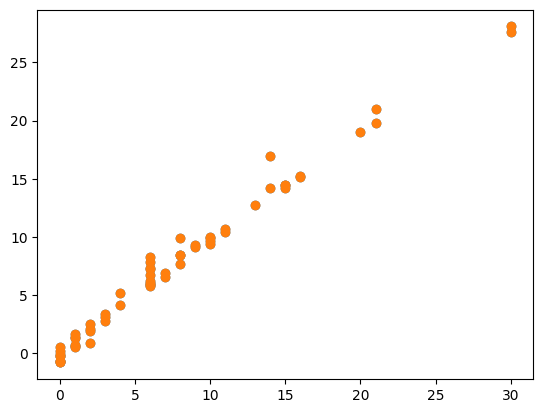

In [31]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2_score",score)
plt.scatter(y_test,y_pred)

## Ridge Regression

Mean Absolute error 0.6089423469016768
R2_score 0.9830098850575751


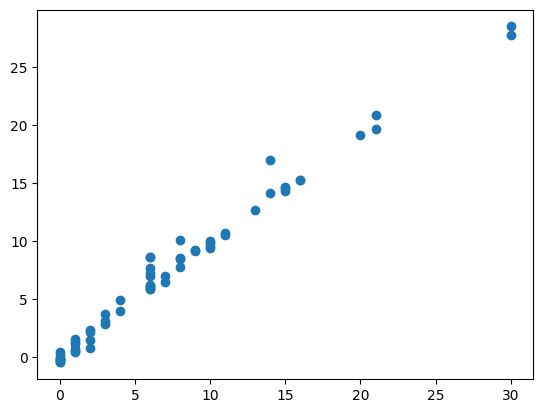

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2_score",score)
plt.scatter(y_test,y_pred)

Mean Absolute error 0.8413530196810566
R2_score 0.9685705449500732


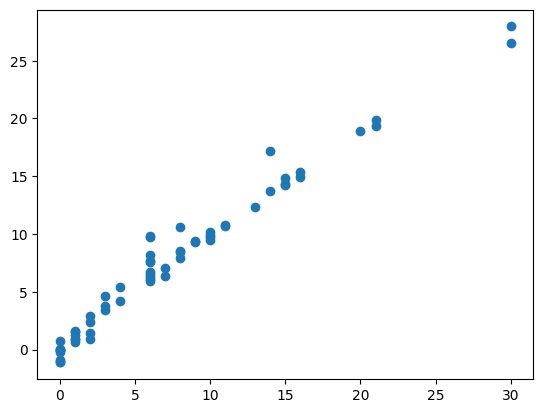

In [33]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2_score",score)
plt.scatter(y_test,y_pred)

In [34]:
ridgecv.alpha_

np.float64(10.0)

In [35]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [36]:
ridgecv.gcv_mode

In [37]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elastic Net

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE",mae)
print("R2_Score",score)

MAE 1.7892696836375175
R2_Score 0.8840352482748784


Mean Absolute error 0.7081316289444911
R2_score 0.9775975412070609


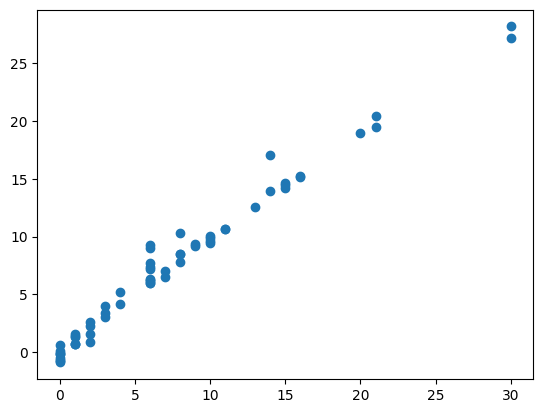

In [39]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2_score",score)
plt.scatter(y_test,y_pred)


In [40]:
elasticcv.alpha_

np.float64(0.04259868472187997)

In [41]:
elasticcv.alphas

## Pickle the machine learning models,preprocessing model Standardscaler


In [43]:
scaler

StandardScaler()

In [44]:
ridge

Ridge()

In [45]:
import pickle


In [49]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))